In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\niran\OneDrive\Desktop\AirPassengers.csv")

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data['Month'] = pd.to_datetime(data['Month'])

<Axes: xlabel='Month'>

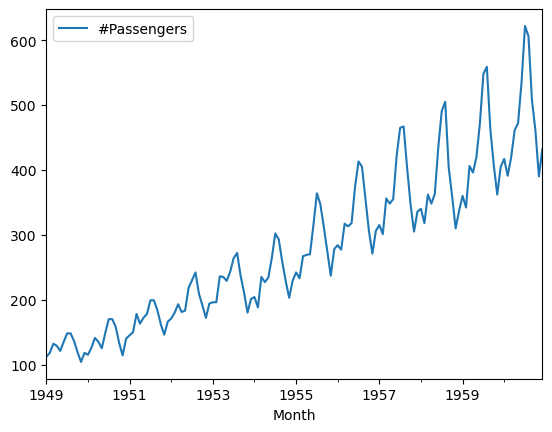

In [7]:
data.plot(x = 'Month', y = '#Passengers')

In [8]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
data.set_index(['Month'], inplace  =True)

In [10]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

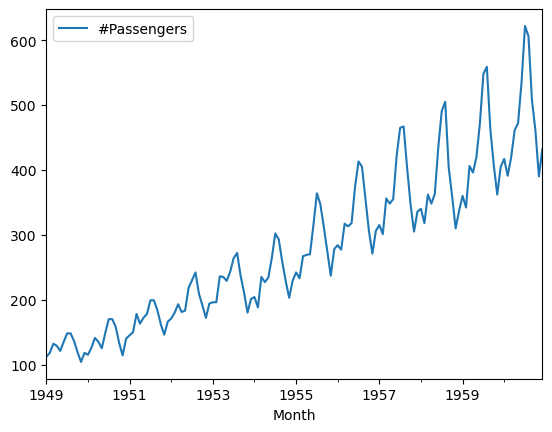

In [11]:
data.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data)

In [13]:
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [14]:
print(f'ADF Statistic = {result[0]}')
print(f'p-value = {result[1]}')
print(f'n_lags = {result[2]}')

ADF Statistic = 0.8153688792060597
p-value = 0.9918802434376411
n_lags = 13


In [15]:
if result[1] > 0.05:
    print('Not stationary')
else:
    print('Stationary')

Not stationary


In [16]:
mean_log = data.rolling(window = 12).mean()
std_log = data.rolling(window = 12).std()

Text(0.5, 1.0, 'Rolling mean and Rolling std')

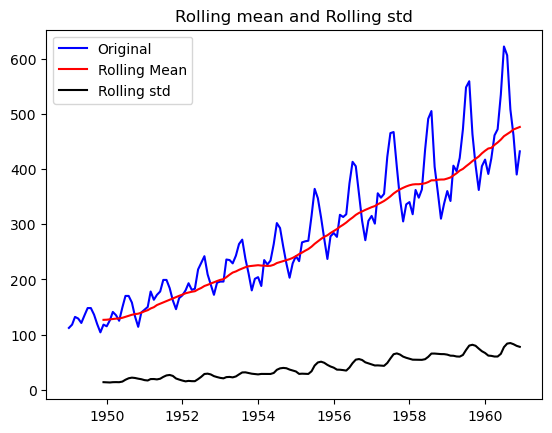

In [17]:
plt.plot(data, color  = 'blue', label = 'Original')
plt.plot(mean_log, color = 'red', label = 'Rolling Mean')
plt.plot(std_log, color = 'black', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean and Rolling std')

In [18]:
first_log = np.log(data)

In [19]:
first_log.dropna(inplace = True)

In [20]:
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

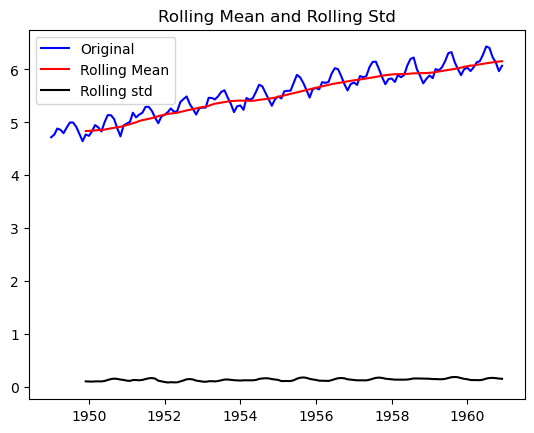

In [21]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [22]:
new_data = first_log - mean_log
new_data.dropna(inplace = True)
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


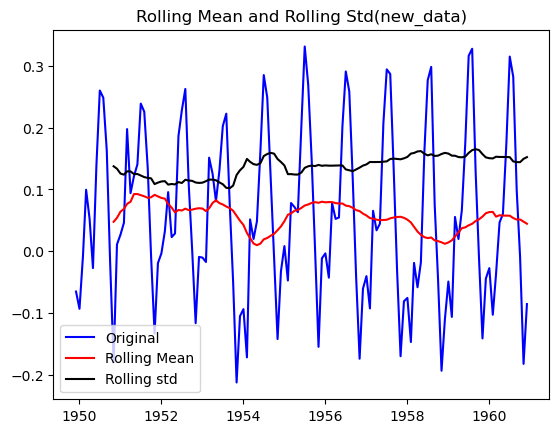

In [23]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std(new_data)')
plt.show()

In [24]:
result = adfuller(new_data)

print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}')

ADF Statistic,-3.1629079913008766
p-value=0.02223463000124264
n_lags,13


In [25]:
if result[1] > 0.05:
    print('Not stationary')
else:
    print('Stationary')

Stationary


Text(0.5, 1.0, 'data')

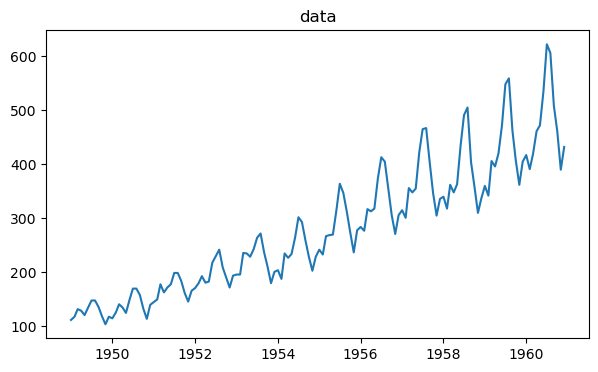

In [26]:
fig= plt.subplots(figsize=(7,4))
plt.plot(data)
plt.title('data')

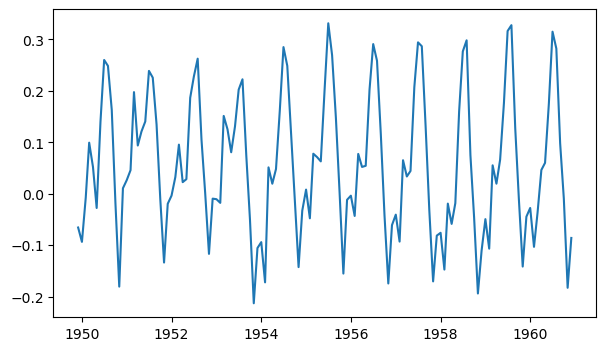

In [27]:
fig= plt.subplots(figsize=(7,4))
plt.plot(new_data)

In [28]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

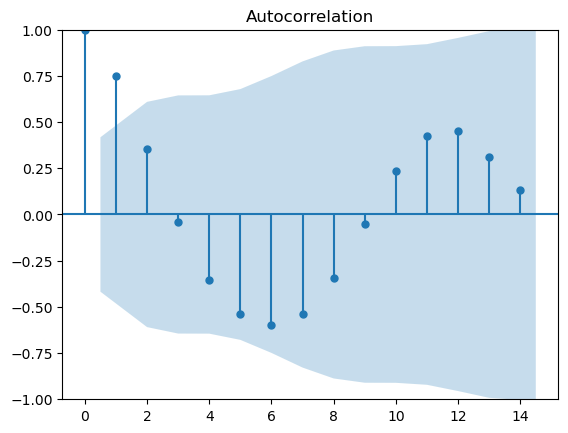

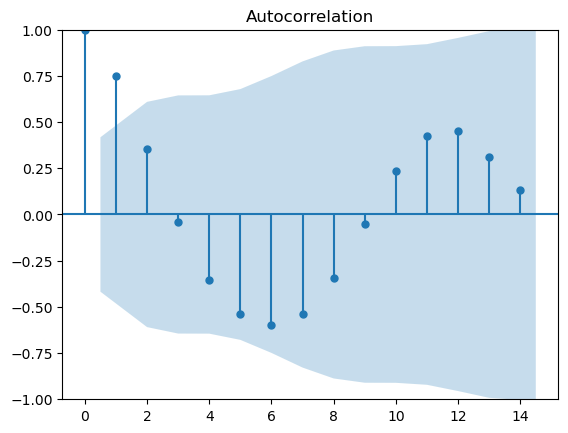

In [29]:
acf_plot = acf(new_data.dropna())
plot_acf(acf_plot)

In [30]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

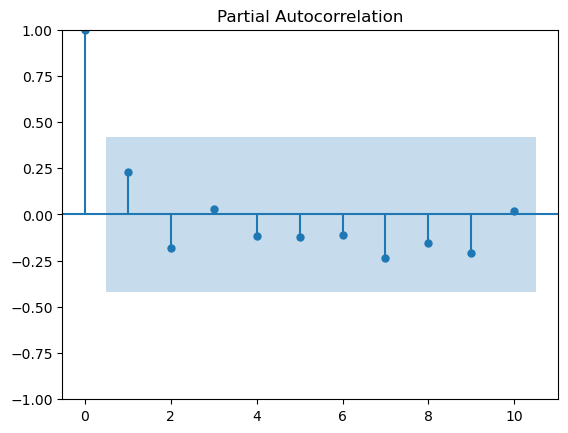

In [31]:
pacf_plot=pacf(new_data.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [32]:
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[120:]['#Passengers']

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train,order=(1,1,2)) #(p,d,q)
model_fit=model.fit()

C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

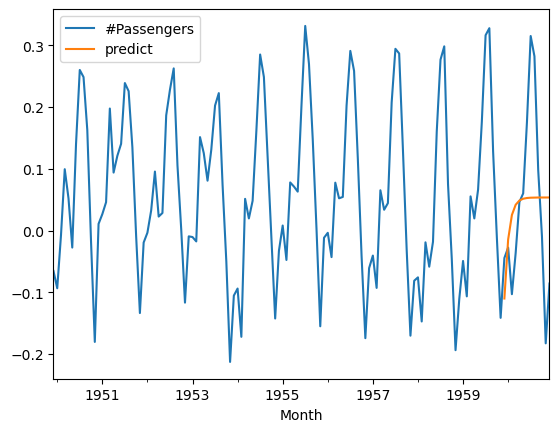

In [34]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()


In [35]:
import itertools

p = range(0,8)
q = range(0,8)
d = range(0,2)

pdq_combination = list(itertools.product(p,d,q))
pdq_combination


print(len(pdq_combination)) #total combinations of p,d,q

from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)


results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
results.sort_values("RMSE") #Least RMSE score are best hyperparamterer for (p,d,q) values

128


C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,RMSE
"(7, 1, 7)",0.048850
"(7, 0, 7)",0.049092
"(7, 0, 6)",0.049585
"(7, 0, 3)",0.053630
"(7, 1, 6)",0.057806
...,...
"(2, 1, 0)",0.217930
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240002
"(0, 1, 1)",0.252661


C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

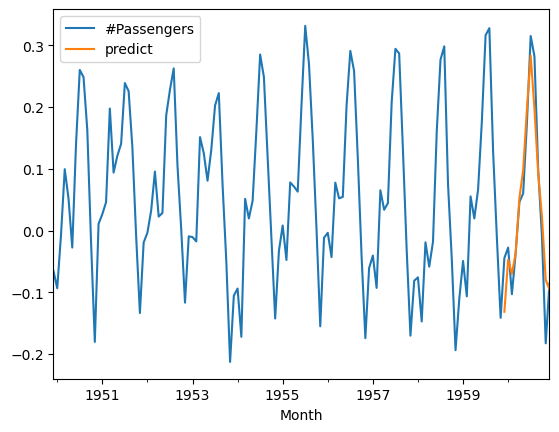

In [36]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(7,1,7)) #() - least rmse
model_fit=model.fit()

new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\niran\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

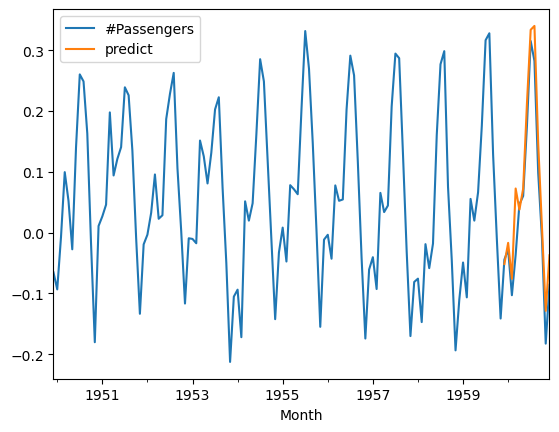

In [38]:
model = SARIMAX(train,order=(1,1,2) , seasonal_order = (1,1,2,12)) #() - least rmse
model_fit=model.fit()

new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()